Resources can be found https://github.com/codebasics/py/tree/master/ML and https://www.youtube.com/watch?v=CQveSaMyEwM

Page for testing/learning the use of KNN witch sci-kit learn using <b>IRIS flower </b> example

> k-number is important to make appropirate (not too large, not too small) consider the amount of data points

> consider feature selection, what is usefull/informative and what is not

> consider data pre-processing

In [9]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

I had issues with this so i followed advice on https://stackoverflow.com/questions/67795808/how-to-install-sklearn-package-in-jupyter-notebook-in-pycharm and ran this:

/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install sklearn
and then the same with matplotlib etc

<b> For any pc: </b> go into to python and run

import sys

print(sys.executable)

This will give you the path you need to then pip install in


<b> Next Up: </b> importing the dataset into an array

In [10]:
iris= load_iris()

Then displaying the <b>feature names</b> of the dataset

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Then displaying the <b> target names </b>

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<b> NOTE: </b> when looking at my data-set it will be first important to view feature and target names so i'm comfortable with both

<b> For this example </b> we are using the <b> features </b> to identify what <b> target </b> it is. e.g. using septal and petal length to decide what type of flower it is

<b> NEXT: </b> i'll create a dataframe with the data in it and display the top n rows ( df.head() selects 5 as default

In [13]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<b> Pandas df.shape </b> returns a tuple representing the dimensionality of the dataframe
(numberOfRows,numberOfColumns)


In [14]:
df.shape

(150, 4)

So the <b> DF </b> has 150 rows (entries) and has 4 columns in this instance

Next up we will be adding in the <b> target </b> into the DF

In [15]:
df['target']= iris.target

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<b>remembering </b>

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

where target = 0 in the far column of the df, this means the flower is setosa (based on location in array)

<b> next: </b> i want to display the parts of df where the target = 1 ( and therefore is versicolor)

In [18]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


<b> next: </b> i can do this again to show number 2 in the array 'Virginica' <b> etc etc </b>

In [19]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


From the data above we can see we have 150 records, considering the tables entries 0-49 are setosa, 50-99 are versicolor and 100-150 are virginica

These are our <b> training samples </b>

<b> from here we want to split the main data frame into 3 based upon targets </b>

In [20]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

Next we can start to think about <b>plotting these points </b> on a graph

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

<b> Sepal length vs Sepal width (Setosa vs Versicolor) </b>

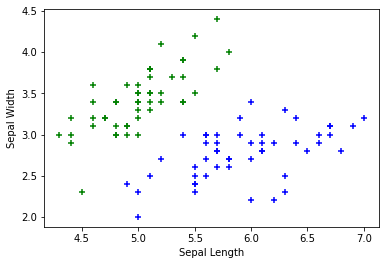

In [22]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green", marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue", marker='+')

<b> Petal length vs Petal width (Setosa vs Versicolor) </b>

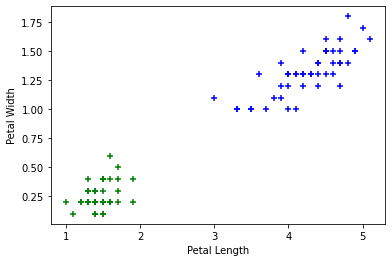

In [23]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green", marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue", marker='+')

<b> TRAIN TEST SPLIT </b>
We now need to start thinking of how we want to split the dataset so we can use some for training and some for testing 

In [24]:
from sklearn.model_selection import train_test_split 

The code below sets the x and y values. For x it drops the target and flower name columns

In [25]:
X = df.drop(['target'], axis ='columns')
y = df.target

Next we will split the data up into training and testing sets

In [26]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

Now we can see that the size of X_train is 120 wheras x test is 30 (same with y)

In [27]:
len(X_test)

30

In [28]:
len(X_train)

120

<b> Create KNN: </b> K-Nearest Neighbour Classifier

<b> Documentation: </b> https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
<b> Tutorial followed: </b> https://www.youtube.com/watch?v=CQveSaMyEwM

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Now the classifer is trained. next up compute the score

In [31]:
knn.score(X_test,y_test)

0.9666666666666667

The model is so accurate it got all the predictions right (that is what 1 symbolises) when k = 3

Different k values will give diff scores. Working out the best k value is very important. Can use some tools to do so (gridseachcv or k fold cross validation: https://machinelearningmastery.com/k-fold-cross-validation/)

Now going to <b> change the k value to 10 for demo purposes </b>

Now to see <b> where it did and didn't get the prediction right </b> where the k value is set to 10

In [32]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

cm= confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

This gives us a simple array output of the results but we can make this better/easier to understand by using the code below

Text(42.0, 0.5, 'Truth')

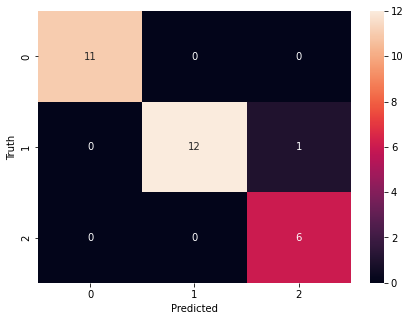

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize= (7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

This shows the <b> same exact grid as above but in a clearer way </b>

> Anything on the diagonal are the <b> correct predictions </b> 

- For example: the 0 value stands for setosa so where truth =0 and predicted =0 then this was correctly predicted.
- Then: where 2 is predicted but 1 is the truth, this has predicted this inccorectly on one occasion.
- We can see that out of the 30 data points, only one was predicted incorrectly

This will be <b> very useful for evaluating my model </b>

We can also use the <b> classification report </b> to evaluate the results.
> If you do this without using a print statement the formatting will be awful

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



As you can see above it is giving a precision score for each of the classes (0,1,2) which again we can see that the wrong prediction was for target 1 which was wrongly predicted as 2

> take a look at the differences in the precision and recall values

<b> Deeper look into precision recall </b>

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
See page for the exact equations
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html (overview for classification_report)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support (specifics on metrics)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



The results above use <b> precision recall </b>

The <b> Precision (p) value </b> is defined as the number of true-positives over the number of true-positives plus the number of false-positives

The <b> Recall (R) value </b> is defines as the number of true positives over the number of true-positives plus the number of false-negatives

The <b> F1 score </b> is defined as the harmonic mean of the precision and recall

so f1 = 2((P*R)/(P+R))


The <b> support score </b> is defined as the number of occurrences of each label in y_true.

> <b> Note: </b> Precision may not decreade with recall

We can plot this (see webpage)